In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
from cartopy.feature import NaturalEarthFeature

#### Load up the CSV from Josh's github

In [2]:
data_csv = 'https://raw.githubusercontent.com/kingjml/CryoVEX2017-OpenData/master/Alert88N_Snow.csv'
df = pd.read_csv(data_csv)
assert df.shape == (14849, 7) # just in case anything changes
df.head()

,timestamp,lat,lon,depth,unit,site,rtcfail
0,2017-04-11 14:10:09 GMT+5,83.442233,-64.414982,36.64,4,2,0
1,2017-04-11 14:10:12 GMT+5,83.442227,-64.414953,41.08,4,2,0
2,2017-04-11 14:10:15 GMT+5,83.442220,-64.414933,48.74,4,2,0
3,2017-04-11 14:10:17 GMT+5,83.442212,-64.414920,47.85,4,2,0
4,2017-04-11 14:10:19 GMT+5,83.442192,-64.414872,43.80,4,2,0


#### Get the extent with a 3° buffer, as well as the latlon for CFS Alert

In [4]:
min_lat = df['lat'].min() - 3
max_lat = df['lat'].max() + 3
min_lon = df['lon'].min() - 3
max_lon = df['lon'].max() + 3
center_lat = np.mean([min_lat, min_lat])
center_lon = np.mean([min_lon, max_lon])

alert_lat = 82+(30/60)+(5/3600)
alert_lon = -62-(20/60)-(20/3600)

# could use these for colormapping but too lazy
depth_max = df['depth'].max()
depth_vals = abs(df['depth'])

#### Rather than plot all the points, get a general site location and the mean depth

In [5]:
# unique sites
site_labels = list(df['site'].unique())

site_lats = []
site_lons = []
site_depths = []

for label in site_labels:
    mean_lat, mean_lon, mean_depth = df.loc[df['site'] == label, ['lat', 'lon', 'depth']].mean()
    site_lats.append(mean_lat)
    site_lons.append(mean_lon)
    site_depths.append(mean_depth)

#### Function that manually plots the labels and arrows for each site

In [6]:
## helper function for site labels
def add_site_labels_arrows(ax, site_labels, site_lats, site_lons):
    # Site 1
    ax.text(site_lons[6]+8, site_lats[6], "Site "+site_labels[6], transform=ccrs.Geodetic())
    ax.arrow(site_lons[6]+7.5, site_lats[6]+0.10, -5, -0.10,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 2
    ax.text(site_lons[0]-20, site_lats[0]-0.5, "Site "+site_labels[0], transform=ccrs.Geodetic())
    ax.arrow(site_lons[0]-13.5, site_lats[0]-0.25, 11.5, 0.2,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 3
    ax.text(site_lons[1]+5, site_lats[1]+1, "Site "+site_labels[1], transform=ccrs.Geodetic())
    ax.arrow(site_lons[1]+7, site_lats[1]+0.8, -4, -0.5,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())    
    # Site 4         
    ax.text(site_lons[7]-20, site_lats[7]-0.5, "Site "+site_labels[7], transform=ccrs.Geodetic())
    ax.arrow(site_lons[7]-13, site_lats[7]-0.2, 10, 0.18,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 5
    ax.text(site_lons[4]-18.5, site_lats[4]-0.4, "Site "+site_labels[4], transform=ccrs.Geodetic())
    ax.arrow(site_lons[4]-10, site_lats[4]-0.11, 7, 0.09,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 6
    ax.text(site_lons[5]-20, site_lats[5]-0.5, "Site "+site_labels[5], transform=ccrs.Geodetic())
    ax.arrow(site_lons[5]-11, site_lats[5]-0.18, 8, 0.12,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 7
    ax.text(site_lons[2]-20, site_lats[2]-0.5, "Site "+site_labels[2], transform=ccrs.Geodetic())
    ax.arrow(site_lons[2]-11, site_lats[2]-0.15, 8.5, 0.13,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 8
    ax.text(site_lons[3]-20, site_lats[3]-0.5, "Site "+site_labels[3], transform=ccrs.Geodetic())
    ax.arrow(site_lons[3]-10, site_lats[3]-0.11, 7, 0.09,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())    
    # Site 9
    ax.text(site_lons[8]-24, site_lats[8]-0.6, "Site "+site_labels[8], transform=ccrs.Geodetic())
    ax.arrow(site_lons[8]-13, site_lats[8]-0.11, 9, 0.1,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site 10 
    ax.text(site_lons[9]-24, site_lats[9]-0.8, "Site "+site_labels[9], transform=ccrs.Geodetic())
    ax.arrow(site_lons[9]-12, site_lats[9]-0.15, 9, 0.1,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site NE3
    ax.text(site_lons[10]+12, site_lats[10]+0.7, "Site "+site_labels[10], transform=ccrs.Geodetic())
    ax.arrow(site_lons[10]+12, site_lats[10]+0.6, -9, -0.45,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())
    # Site NE2
    ax.text(site_lons[11]+12, site_lats[11]+0.7, "Site "+site_labels[11], transform=ccrs.Geodetic())
    ax.arrow(site_lons[11]+12, site_lats[11]+0.6, -9, -0.45,
             linewidth=1.5, head_width=0.1, head_length=1, fc='k', ec='k',
             zorder=0, transform=ccrs.PlateCarree())    
    return

#### Plot the figure
##### This cell will have to be run twice if you don't already have the NaturalEarth vector data

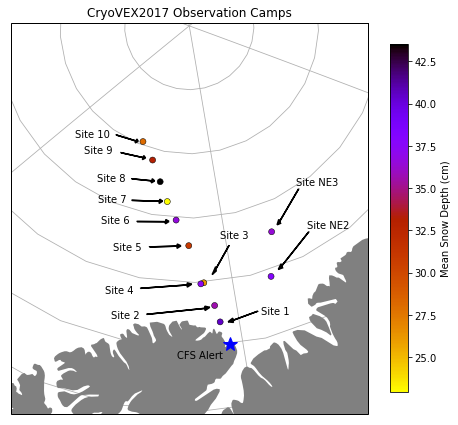

In [10]:
cm = plt.cm.get_cmap('gnuplot_r')

fig = plt.figure(figsize=(8,8), facecolor='white')
ax = plt.axes(projection=ccrs.Orthographic(center_lon, center_lat))
ax.add_feature(NaturalEarthFeature(category='physical', scale='50m', 
                                   name='land', facecolor='gray'))
ax.gridlines(zorder=0)
ax.set_extent([min_lon, max_lon, min_lat, max_lat])

# site markers
sc = ax.scatter(site_lons, site_lats, c=site_depths, cmap=cm, 
           marker='o', edgecolor='k', linewidth=0.5, transform=ccrs.Geodetic());

# site labels, manual for each site because I don't think cartopy can handle label/feature overlap
add_site_labels_arrows(ax, site_labels, site_lats, site_lons)

# alert marker
ax.plot(alert_lon, alert_lat, markersize=15, color='blue', 
        marker='*', transform=ccrs.Geodetic())

# alert label
ax.text(alert_lon - 1.5, alert_lat - 0.3, 'CFS Alert',
         horizontalalignment='right',
         transform=ccrs.Geodetic())

ax.set_title('CryoVEX2017 Observation Camps')
plt.colorbar(sc, shrink=0.8, label='Mean Snow Depth (cm)')
plt.show()

In [14]:
fig.savefig('../CryoVEX17-OverviewMap.png', bbox_inches='tight')